# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
from palmerpenguins import load_penguins
penguins = load_penguins()
print(penguins.head())
penguins = pd.get_dummies(penguins, columns=['species', 'island', 'sex'], drop_first=True)


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  year  
0       3750.0    male  2007  
1       3800.0  female  2007  
2       3250.0  female  2007  
3          NaN     NaN  2007  
4       3450.0  female  2007  


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
from sklearn.linear_model import LinearRegression
penguins = penguins.dropna() # This line is added to handle the NaN values

X = penguins.drop('bill_depth_mm', axis=1)  # Features
y = penguins['bill_depth_mm']
reg_model = LinearRegression()
reg_model.fit(X, y)

LinearRegression()

In [7]:
from sklearn.neighbors import KNeighborsRegressor

knn_model1 = KNeighborsRegressor(n_neighbors=5)  # First kNN model with K=5
knn_model1.fit(X, y)

knn_model2 = KNeighborsRegressor(n_neighbors=10) # Second kNN model with K=10
knn_model2.fit(X, y)

KNeighborsRegressor(n_neighbors=10)

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_model = DecisionTreeRegressor()
tree_model.fit(X, y)

DecisionTreeRegressor()

In [13]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *


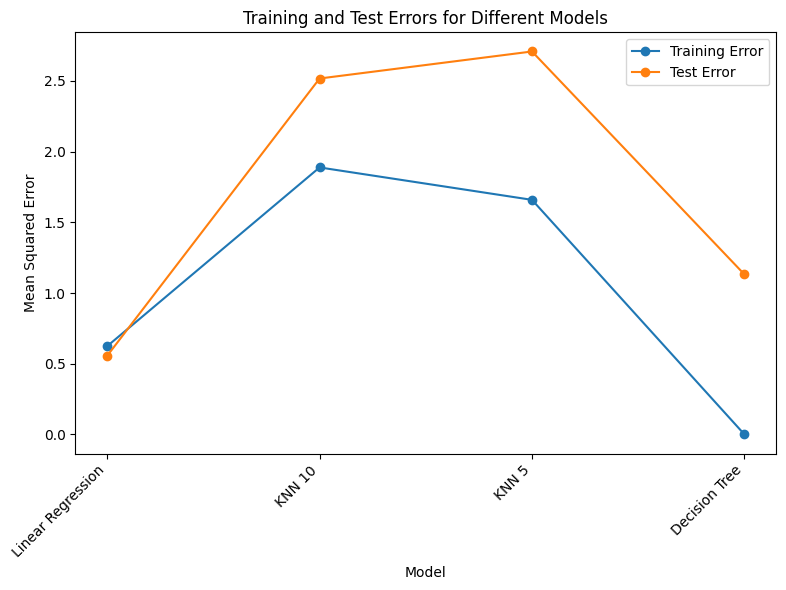

Linear Regression


In [15]:
models = [
    LinearRegression(),
    KNeighborsRegressor(n_neighbors=10),
    KNeighborsRegressor(n_neighbors=5),
    DecisionTreeRegressor()

]
model_names = ['Linear Regression', 'KNN 10', 'KNN 5', 'Decision Tree']  # Update with your model names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_errors = []
test_errors = []
for model in models:
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(8, 6))
plt.plot(model_names, train_errors, label='Training Error', marker='o')
plt.plot(model_names, test_errors, label='Test Error', marker='o')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.title('Training and Test Errors for Different Models')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

best_model_index = np.argmin(test_errors)
best_model_name = model_names[best_model_index]
print(best_model_name)

The best fit Model is Linear Regression